In [1]:
import cv2
import numpy as np
import math
import os
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from matplotlib.widgets import RectangleSelector
import random

In [29]:
color = 4 #1-red, 2-blue, 3-brown, 4-unstained
color_name = "Red" #make sure to capitalize this
outpath = r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\plots"

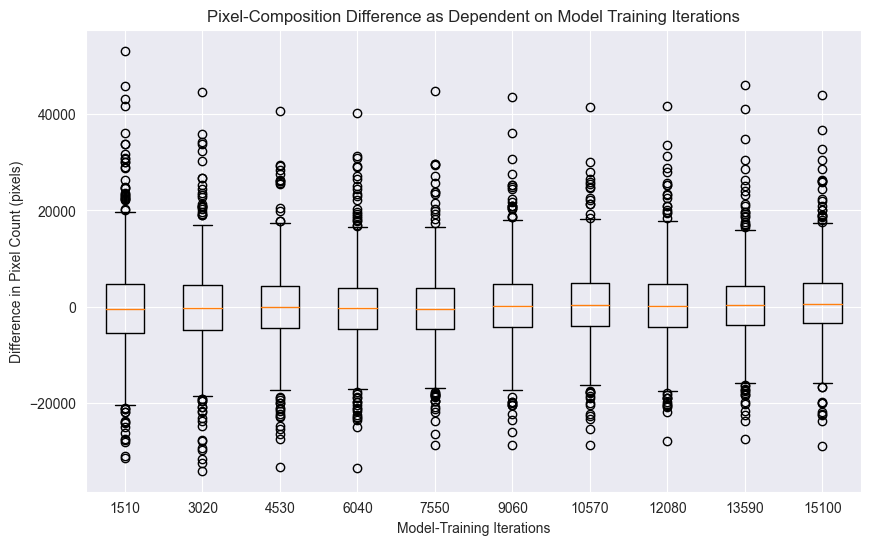

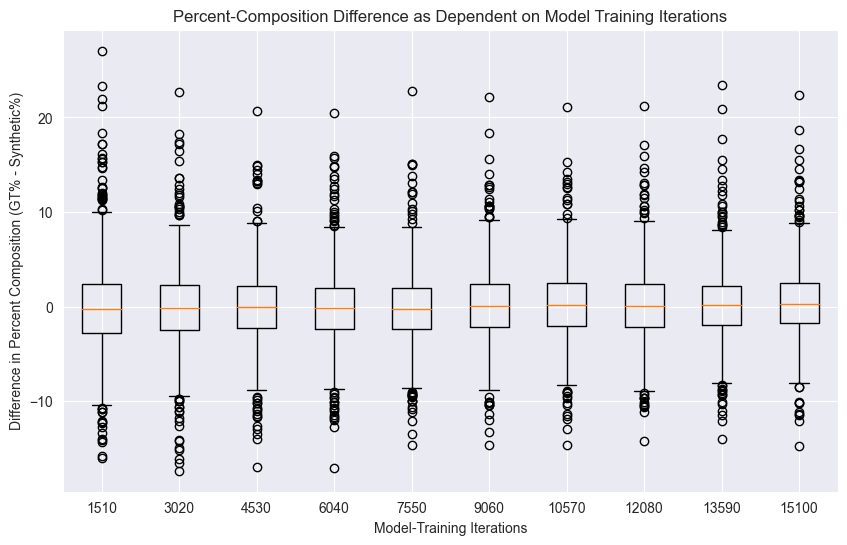

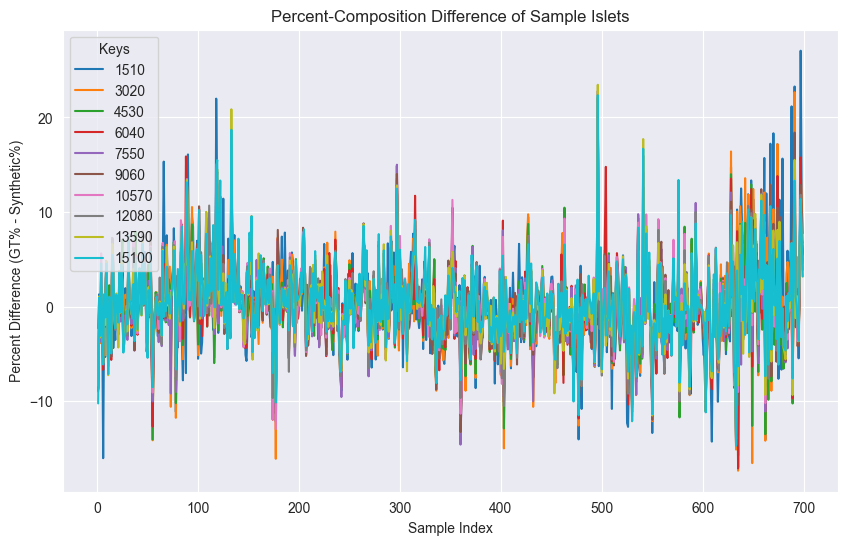

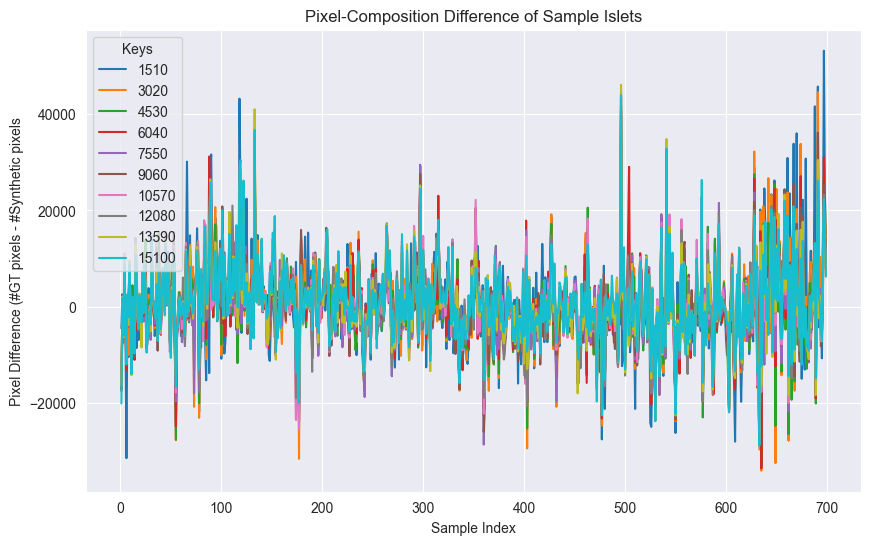

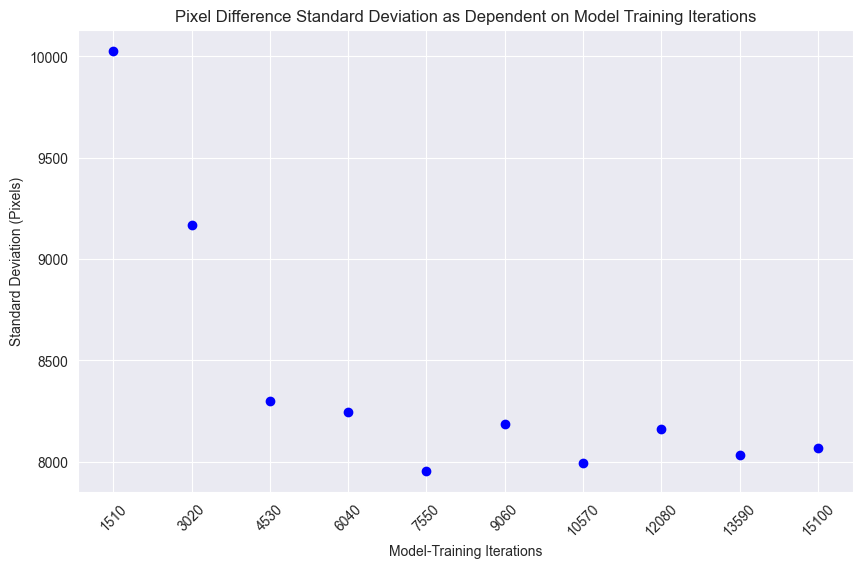

In [30]:
# percent composition
gt_path = r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\GT_IHC_hsv\logicals"
synthetic_paths = [r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_1510_hsv\logicals",
                   r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_3020_hsv\logicals" ,
                   r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_4530_hsv\logicals",
                   r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_6040_hsv\logicals",
                   r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_7550_hsv\logicals",
                   r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_9060_hsv\logicals",
                   r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_10570_hsv\logicals",
                   r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_12080_hsv\logicals",
                   r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_13590_hsv\logicals",
                   r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_15100_hsv\logicals",]
only_files = [f for f in listdir(gt_path) if isfile(join(gt_path, f))]

x = list(range(1, len(only_files) + 1))
pixel_comp_diff = [[],[],[],[],[],[],[],[],[],[],[]]
percent_comp_diff = [[],[],[],[],[],[],[],[],[],[],[]]
index = 0
for read_path in only_files:
    final_path = join(gt_path, read_path)
    #print(f"Processing {final_path}")  # Debugging line to print the file path being processed
    gt_img = cv2.imread(final_path)
    gt_pixel_count = np.count_nonzero(gt_img == color)
    pixel_comp_diff[index].append(gt_pixel_count)
    height, width, channels = gt_img.shape
    composition = gt_pixel_count / (height * width * channels)
    #print("syn_pixel_count ", syn_pixel_count, " composition ", composition)
    #print("index ", index, " ", difference)
    percent_comp_diff[index].append(composition)
index = 1
for syn_path in synthetic_paths:
    subindex = 0
    for read_path in only_files:
        final_path = join(syn_path, read_path.replace('.png', '_inferred.png'))
        #print(f"Processing {final_path}")  # Debugging line to print the file path being processed
        syn_img = cv2.imread(final_path)
        syn_pixel_count = np.count_nonzero(syn_img == color)
        pixel_comp_diff[index].append(pixel_comp_diff[0][subindex] - syn_pixel_count)
        height, width, channels = syn_img.shape
        composition = syn_pixel_count / (height * width * channels)
        composition_difference = 100 * (percent_comp_diff[0][subindex] - composition)
        #print("syn_pixel_count ", syn_pixel_count, " composition ", composition)
        #print("index ", index, " ", difference)
        percent_comp_diff[index].append(composition_difference)
        subindex = subindex + 1
    index = index + 1
# Create and save boxplot for pixel composition differences
pixel_comp_boxplot_path = join(outpath, color_name.lower(), "pixel_diff_boxplot.png")
plt.figure(figsize=(10, 6))
plt.boxplot(pixel_comp_diff[1:], labels=[f'{i*1510}' for i in range(1, len(synthetic_paths)+1)])
plt.title("Pixel-Composition Difference as Dependent on Model Training Iterations")
plt.ylabel("Difference in Pixel Count (pixels)")
plt.xlabel("Model-Training Iterations")
plt.savefig(pixel_comp_boxplot_path, dpi=300, bbox_inches='tight')

percent_comp_boxplot_path = join(outpath, color_name.lower(), "percent_diff_boxplot.png")
# Create and save boxplot for percent composition differences
plt.figure(figsize=(10, 6))
plt.boxplot(percent_comp_diff[1:], labels=[f'{i*1510}' for i in range(1, len(synthetic_paths)+1)])
plt.title("Percent-Composition Difference as Dependent on Model Training Iterations")
plt.ylabel("Difference in Percent Composition (GT% - Synthetic%)")
plt.xlabel("Model-Training Iterations")
plt.savefig(percent_comp_boxplot_path, dpi=300, bbox_inches='tight')

percent_comp_path = join(outpath, color_name.lower(), "percent_diff.png")
plt.figure(figsize=(10, 6))
plt.plot(x, np.array(percent_comp_diff[1:]).T)
keys = [1510 * (i + 1) for i in range(len(percent_comp_diff[1:]))]
plt.title("Percent-Composition Difference of Sample Islets")
plt.xlabel("Sample Index")
plt.ylabel("Percent Difference (GT% - Synthetic%)")
plt.legend([str(key) for key in keys], title="Keys", loc="best")
plt.savefig(percent_comp_path, dpi=300, bbox_inches='tight')

pixel_comp_path = join(outpath, color_name.lower(), "pixel_diff.png")
plt.figure(figsize=(10, 6))
plt.plot(x, np.array(pixel_comp_diff[1:]).T)
keys = [1510 * (i + 1) for i in range(len(pixel_comp_diff[1:]))]
plt.title("Pixel-Composition Difference of Sample Islets")
plt.xlabel("Sample Index")
plt.ylabel("Pixel Difference (#GT pixels - #Synthetic pixels")
plt.legend([str(key) for key in keys], title="Keys", loc="best")
plt.savefig(pixel_comp_path, dpi=300, bbox_inches='tight')

#creating stdev plot
stdev_path = join(outpath, color_name.lower(), "stdev.png")
data = np.array(pixel_comp_diff[1:])
std_devs = np.std(data, axis=1, ddof=1)  # ddof=1 for sample standard deviation
plt.figure(figsize=(10, 6))
plt.scatter(range(len(std_devs)), std_devs, color='blue', marker='o')

# Adding titles and labels
plt.title("Pixel Difference Standard Deviation as Dependent on Model Training Iterations")
plt.xlabel("Model-Training Iterations")
plt.ylabel("Standard Deviation (Pixels)")
plt.xticks(range(len(std_devs)), ['1510', '3020', '4530', '6040', '7550', '9060', '10570', '12080', '13590', '15100'], rotation=45)
plt.savefig(stdev_path, dpi=300, bbox_inches='tight')
plt.show()

C:\Users\yshen97\.conda\envs\ndpi2tif\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 due to no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Error reading images: \\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\GT_HE\classification_07232024\Thumbs.db, \\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_1510\classification_07302024\Thumbs.db, or \\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\GT_IHC\classification_07302024\Thumbs.db


C:\Users\yshen97\.conda\envs\ndpi2tif\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 due to no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Error reading images: \\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\GT_HE\classification_07232024\Thumbs.db, \\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_3020\classification_07302024\Thumbs.db, or \\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\GT_IHC\classification_07302024\Thumbs.db


C:\Users\yshen97\.conda\envs\ndpi2tif\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 due to no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Error reading images: \\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\GT_HE\classification_07232024\Thumbs.db, \\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_4530\classification_07302024\Thumbs.db, or \\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\GT_IHC\classification_07302024\Thumbs.db


C:\Users\yshen97\.conda\envs\ndpi2tif\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 due to no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Error reading images: \\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\GT_HE\classification_07232024\Thumbs.db, \\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_6040\classification_07302024\Thumbs.db, or \\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\GT_IHC\classification_07302024\Thumbs.db


C:\Users\yshen97\.conda\envs\ndpi2tif\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 due to no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Error reading images: \\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\GT_HE\classification_07232024\Thumbs.db, \\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_7550\classification_07302024\Thumbs.db, or \\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\GT_IHC\classification_07302024\Thumbs.db


C:\Users\yshen97\.conda\envs\ndpi2tif\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 due to no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Error reading images: \\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\GT_HE\classification_07232024\Thumbs.db, \\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_9060\classification_07302024\Thumbs.db, or \\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\GT_IHC\classification_07302024\Thumbs.db


C:\Users\yshen97\.conda\envs\ndpi2tif\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 due to no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Error reading images: \\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\GT_HE\classification_07232024\Thumbs.db, \\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_10570\classification_07302024\Thumbs.db, or \\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\GT_IHC\classification_07302024\Thumbs.db


C:\Users\yshen97\.conda\envs\ndpi2tif\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 due to no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Error reading images: \\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\GT_HE\classification_07232024\Thumbs.db, \\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_12080\classification_07302024\Thumbs.db, or \\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\GT_IHC\classification_07302024\Thumbs.db


C:\Users\yshen97\.conda\envs\ndpi2tif\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 due to no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Error reading images: \\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\GT_HE\classification_07232024\Thumbs.db, \\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_13590\classification_07302024\Thumbs.db, or \\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\GT_IHC\classification_07302024\Thumbs.db


C:\Users\yshen97\.conda\envs\ndpi2tif\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 due to no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Error reading images: \\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\GT_HE\classification_07232024\Thumbs.db, \\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_15100\classification_07302024\Thumbs.db, or \\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\GT_IHC\classification_07302024\Thumbs.db


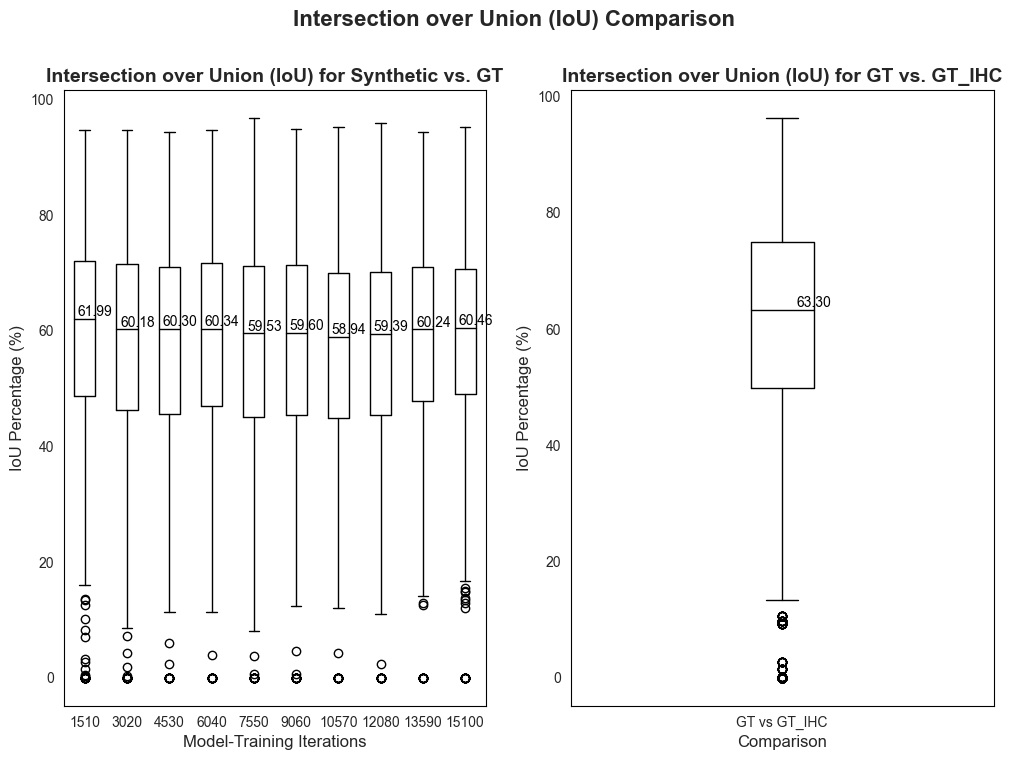

In [150]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
from sklearn.metrics import jaccard_score

# Define paths
gt_path = r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\GT_HE\classification_07232024"
synthetic_paths = [
    r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_1510\classification_07302024",
    r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_3020\classification_07302024",
    r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_4530\classification_07302024",
    r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_6040\classification_07302024",
    r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_7550\classification_07302024",
    r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_9060\classification_07302024",
    r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_10570\classification_07302024",
    r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_12080\classification_07302024",
    r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_13590\classification_07302024",
    r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_15100\classification_07302024",
]
gt_ihc = r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\GT_IHC\classification_07302024"

# List files in the ground truth path
only_files = [f for f in listdir(gt_path) if isfile(join(gt_path, f))]

# Initialize variables
y_coords_syn = [[] for _ in range(len(synthetic_paths))]
y_coords_gt_ihc = []

# Loop through synthetic paths and calculate IoU
for index, syn_path in enumerate(synthetic_paths):
    for read_path in only_files:
        final_gt_path = join(gt_path, read_path)
        final_synthetic_path = join(syn_path, read_path.replace('.tif', '_inferred.tif'))
        final_gt_ihc_path = join(gt_ihc, read_path)

        # Read images
        gt_img = cv2.imread(final_gt_path, cv2.IMREAD_GRAYSCALE)
        syn_img = cv2.imread(final_synthetic_path, cv2.IMREAD_GRAYSCALE)
        gt_ihc_img = cv2.imread(final_gt_ihc_path, cv2.IMREAD_GRAYSCALE)

        # Check if images are read correctly
        if gt_img is None or syn_img is None or gt_ihc_img is None:
            print(f"Error reading images: {final_gt_path}, {final_synthetic_path}, or {final_gt_ihc_path}")
            continue

        # Flatten images to 1D for sklearn's jaccard_score function
        gt_flat = gt_img.flatten()
        syn_flat = syn_img.flatten()
        gt_ihc_flat = gt_ihc_img.flatten()

        # Calculate IoU using jaccard_score
        iou_syn = jaccard_score(gt_flat, syn_flat, average='binary')
        iou_gt_ihc = jaccard_score(gt_flat, gt_ihc_flat, average='binary')

        # Store IoU in y_coords
        y_coords_syn[index].append(iou_syn * 100)  # Convert to percentage
        y_coords_gt_ihc.append(iou_gt_ihc * 100)  # Convert to percentage

plt.figure(figsize=(12, 12))  # Increased vertical size for stretching

# Define an offset for shifting the median labels
y_offset = 2  # Adjust this value as needed for your specific plot

# Plot boxplot for synthetic vs GT
plt.subplot(1, 2, 1)
box1 = plt.boxplot(y_coords_syn, labels=[f'{i * 1510}' for i in range(1, len(synthetic_paths) + 1)],
                   boxprops=dict(color='black'), whiskerprops=dict(color='black'),
                   capprops=dict(color='black'), medianprops=dict(color='black'))
plt.title("Intersection over Union (IoU) for Synthetic vs. GT", fontsize=14, fontweight='bold')
plt.ylabel("IoU Percentage (%)", fontsize=12)
plt.xlabel("Model-Training Iterations", fontsize=12)

# Add integer labels slightly above the median line and centered in the boxplot
for i, line in enumerate(box1['medians']):
    x = line.get_xdata().mean()  # Center of the median line
    y = line.get_ydata()[0] + y_offset  # The y-value of the median, shifted up
    plt.text(x, y, f'{int(round(y - y_offset))}', horizontalalignment='center', verticalalignment='bottom', color='black', fontsize=10)

# Customize the plot
plt.gca().set_facecolor('white')  # Set white background
plt.gca().spines['top'].set_color('black')  # Set black axis lines
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.grid(False)

# Plot boxplot for GT vs GT_IHC
plt.subplot(1, 2, 2)
box2 = plt.boxplot([y_coords_gt_ihc], labels=['GT vs GT_IHC'],
                   boxprops=dict(color='black'), whiskerprops=dict(color='black'),
                   capprops=dict(color='black'), medianprops=dict(color='black'))
plt.title("Intersection over Union (IoU) for GT vs. GT_IHC", fontsize=14, fontweight='bold')
plt.ylabel("IoU Percentage (%)", fontsize=12)
plt.xlabel("Comparison", fontsize=12)

# Add integer labels slightly above the median line and centered in the boxplot
for i, line in enumerate(box2['medians']):
    x = line.get_xdata().mean()  # Center of the median line
    y = line.get_ydata()[0] + y_offset  # The y-value of the median, shifted up
    plt.text(x, y, f'{int(round(y - y_offset))}', horizontalalignment='center', verticalalignment='bottom', color='black', fontsize=10)

# Customize the plot
plt.gca().set_facecolor('white')  # Set white background
plt.gca().spines['top'].set_color('black')  # Set black axis lines
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.grid(False)

# Overall title
plt.suptitle("Intersection over Union (IoU) Comparison", fontsize=16, fontweight='bold')
# Save and show the plot
iou_path = join(outpath, "IoUboxplots.png")
plt.savefig(iou_path, dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

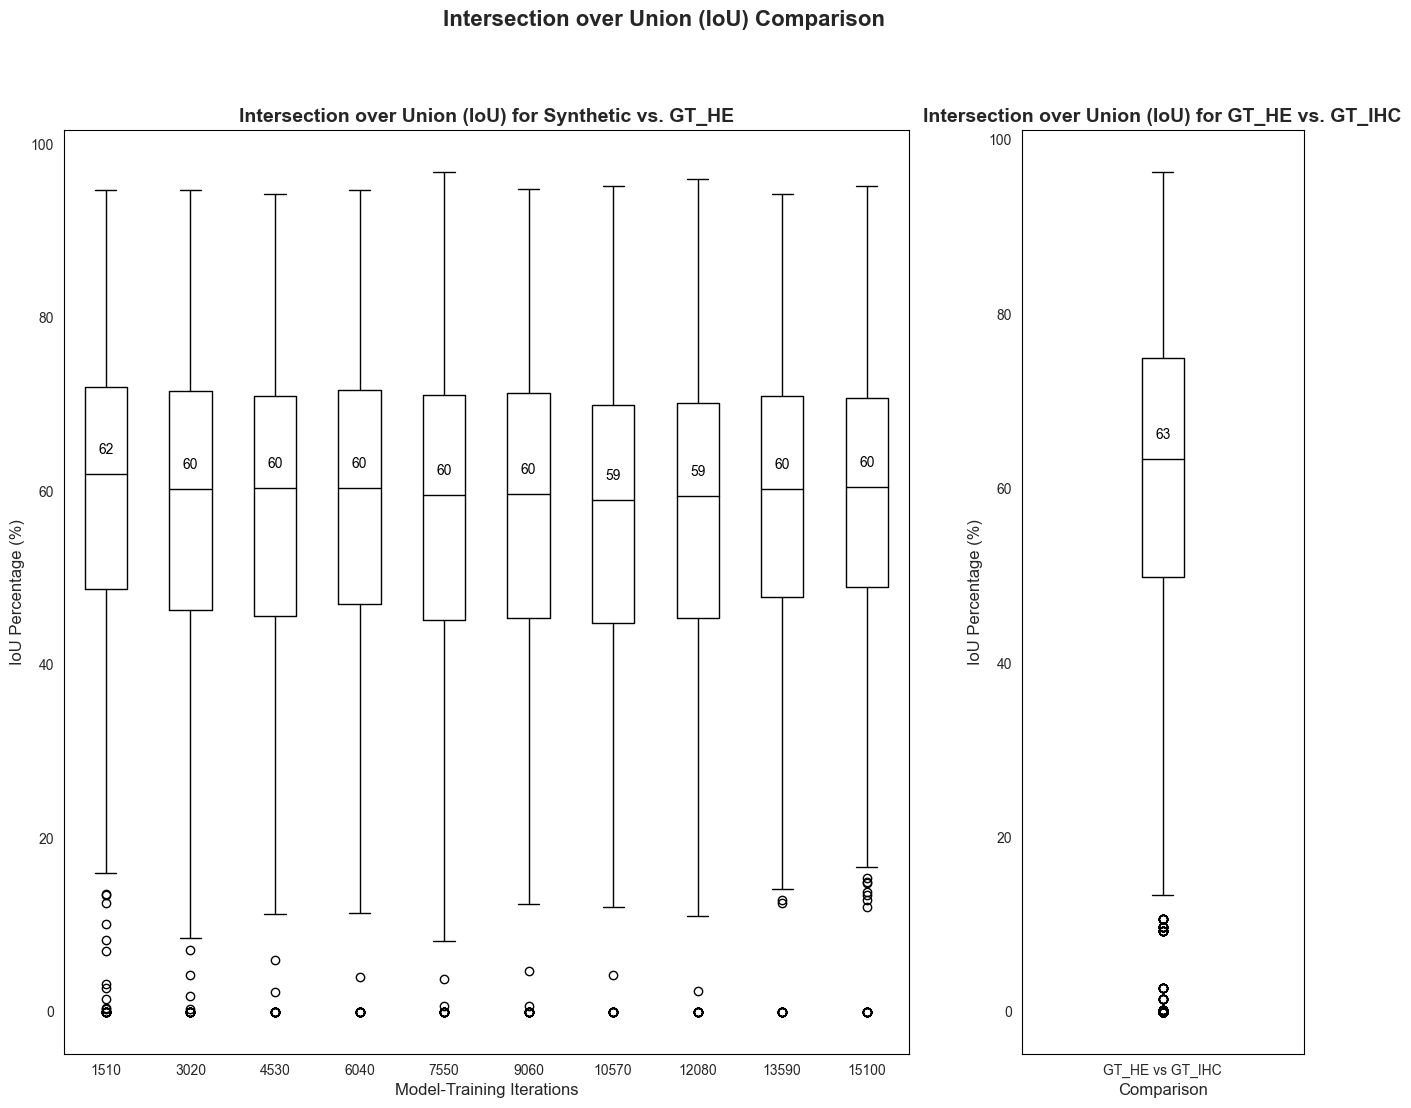

In [159]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

plt.figure(figsize=(16, 12))  # Increase figure width for more space between plots

# Define an offset for shifting the median labels
y_offset = 2  # Adjust this value as needed for your specific plot

# Create a GridSpec with wider width ratios to give more space to the plots
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])

# Plot boxplot for synthetic vs GT
ax1 = plt.subplot(gs[0])
box1 = ax1.boxplot(y_coords_syn, labels=[f'{i * 1510}' for i in range(1, len(synthetic_paths) + 1)],
                   boxprops=dict(color='black'), whiskerprops=dict(color='black'),
                   capprops=dict(color='black'), medianprops=dict(color='black'))
ax1.set_title("Intersection over Union (IoU) for Synthetic vs. GT_HE", fontsize=14, fontweight='bold')
ax1.set_ylabel("IoU Percentage (%)", fontsize=12)
ax1.set_xlabel("Model-Training Iterations", fontsize=12)

# Add integer labels slightly above the median line and centered in the boxplot
for i, line in enumerate(box1['medians']):
    x = line.get_xdata().mean()  # Center of the median line
    y = line.get_ydata()[0] + y_offset  # The y-value of the median, shifted up
    ax1.text(x, y, f'{int(round(y - y_offset))}', horizontalalignment='center', verticalalignment='bottom', color='black', fontsize=10)

# Customize the plot
ax1.set_facecolor('white')  # Set white background
ax1.spines['top'].set_color('black')  # Set black axis lines
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.spines['right'].set_color('black')
ax1.grid(False)

# Plot boxplot for GT vs GT_IHC
ax2 = plt.subplot(gs[1])
box2 = ax2.boxplot([y_coords_gt_ihc], labels=['GT_HE vs GT_IHC'],
                   boxprops=dict(color='black'), whiskerprops=dict(color='black'),
                   capprops=dict(color='black'), medianprops=dict(color='black'))
ax2.set_title("Intersection over Union (IoU) for GT_HE vs. GT_IHC", fontsize=14, fontweight='bold')
ax2.set_ylabel("IoU Percentage (%)", fontsize=12)
ax2.set_xlabel("Comparison", fontsize=12)

# Add integer labels slightly above the median line and centered in the boxplot
for i, line in enumerate(box2['medians']):
    x = line.get_xdata().mean()  # Center of the median line
    y = line.get_ydata()[0] + y_offset  # The y-value of the median, shifted up
    ax2.text(x, y, f'{int(round(y - y_offset))}', horizontalalignment='center', verticalalignment='bottom', color='black', fontsize=10)

# Customize the plot
ax2.set_facecolor('white')  # Set white background
ax2.spines['top'].set_color('black')  # Set black axis lines
ax2.spines['bottom'].set_color('black')
ax2.spines['left'].set_color('black')
ax2.spines['right'].set_color('black')
ax2.grid(False)

# Overall title
plt.suptitle("Intersection over Union (IoU) Comparison", fontsize=16, fontweight='bold')
iou_path = join(outpath, "IoUboxplots.png")
plt.savefig(iou_path, dpi=300, bbox_inches='tight')
# Show the plot
plt.show()


In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

# Define color indices and names
colors = [1, 2, 3, 4]
color_names = ["Red", "Blue", "Brown", "Unstained"]
color_map = ["red", "blue", "brown", "gray"]

gt_path = r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\GT_IHC_hsv\logicals"
synthetic_paths = [
    r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_1510_hsv\logicals",
    r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_3020_hsv\logicals",
    r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_4530_hsv\logicals",
    r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_6040_hsv\logicals",
    r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_7550_hsv\logicals",
    r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_9060_hsv\logicals",
    r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_10570_hsv\logicals",
    r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_12080_hsv\logicals",
    r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_13590_hsv\logicals",
    r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_15100_hsv\logicals",
]
outpath = r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\plots"

only_files = [f for f in listdir(gt_path) if isfile(join(gt_path, f))]
x = list(range(1, len(only_files) + 1))

# Process all colors
all_pixel_comp_diff = {color: [[] for _ in range(len(synthetic_paths) + 1)] for color in colors}
all_percent_comp_diff = {color: [[] for _ in range(len(synthetic_paths) + 1)] for color in colors}

for color in colors:
    # Process ground truth
    for read_path in only_files:
        final_path = join(gt_path, read_path)
        gt_img = cv2.imread(final_path)
        gt_pixel_count = np.count_nonzero(gt_img == color)
        all_pixel_comp_diff[color][0].append(gt_pixel_count)
        height, width, channels = gt_img.shape
        composition = gt_pixel_count / (height * width * channels)
        all_percent_comp_diff[color][0].append(composition)

    # Process synthetic images
    for index, syn_path in enumerate(synthetic_paths, start=1):
        for read_path in only_files:
            final_path = join(syn_path, read_path.replace('.png', '_inferred.png'))
            syn_img = cv2.imread(final_path)
            syn_pixel_count = np.count_nonzero(syn_img == color)
            all_pixel_comp_diff[color][index].append(all_pixel_comp_diff[color][0][index-1] - syn_pixel_count)
            height, width, channels = syn_img.shape
            composition = syn_pixel_count / (height * width * channels)
            composition_difference = 100 * (all_percent_comp_diff[color][0][index-1] - composition)
            all_percent_comp_diff[color][index].append(composition_difference)

# Create combined boxplots for all colors (Percent Composition Difference)
plt.figure(figsize=(14, 8))
plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')

offset = 0.3  # Offset to create space between the groups of box plots
total_positions = len(colors) + 1  # Number of colors plus 1 for spacing

for i, (color, color_name, col) in enumerate(zip(colors, color_names, color_map)):
    positions = [j * total_positions + i + 1 for j in range(len(synthetic_paths))]
    bp = plt.boxplot([all_percent_comp_diff[color][j+1] for j in range(len(synthetic_paths))],
                     positions=positions, widths=0.6, patch_artist=True)
    for patch in bp['boxes']:
        patch.set_facecolor(col)

plt.title("Percent-Composition Difference for All Colors")
plt.ylabel("Difference in Percent Composition (GT% - Synthetic%)")
plt.xlabel("Model-Training Iterations")
plt.xticks([j * total_positions + 1.5 for j in range(len(synthetic_paths))], [f'{i*1510}' for i in range(1, len(synthetic_paths)+1)])
plt.legend([plt.Rectangle((0,0),1,1, fc=col) for col in color_map], color_names, loc='best')
plt.savefig(join(outpath, "all_colors_percent_diff_boxplot.png"), dpi=300, bbox_inches='tight')
plt.close()

# Create combined boxplots for all colors (Pixel Composition Difference)
plt.figure(figsize=(14, 8))
plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')

for i, (color, color_name, col) in enumerate(zip(colors, color_names, color_map)):
    positions = [j * total_positions + i + 1 for j in range(len(synthetic_paths))]
    bp = plt.boxplot([all_pixel_comp_diff[color][j+1] for j in range(len(synthetic_paths))],
                     positions=positions, widths=0.6, patch_artist=True)
    for patch in bp['boxes']:
        patch.set_facecolor(col)

plt.title("Pixel-Composition Difference for All Colors")
plt.ylabel("Difference in Pixel Count (pixels)")
plt.xlabel("Model-Training Iterations")
plt.xticks([j * total_positions + 1.5 for j in range(len(synthetic_paths))], [f'{i*1510}' for i in range(1, len(synthetic_paths)+1)])
plt.legend([plt.Rectangle((0,0),1,1, fc=col) for col in color_map], color_names, loc='best')
plt.savefig(join(outpath, "all_colors_pixel_diff_boxplot.png"), dpi=300, bbox_inches='tight')
plt.close()


KeyboardInterrupt: 

In [42]:
import matplotlib.pyplot as plt
from os.path import join

# Define color indices and names (for reference)
colors = [1, 2, 3, 4]
color_names = ["Red", "Blue", "Brown", "Unstained"]
color_map = ["red", "blue", "brown", "gray"]
outpath = r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\plots"

# Create combined boxplots for all colors (Percent Composition Difference)
plt.figure(figsize=(20, 8))
plt.gca().set_facecolor('white')
for spine in plt.gca().spines.values():
    spine.set_color('black')

total_colors = len(colors)
total_iterations = len(all_percent_comp_diff[colors[0]]) - 1
group_width = 0.8
box_width = group_width / total_iterations

for i, (color, col) in enumerate(zip(colors, color_map)):
    positions = [i * (total_iterations + 1) + j + 1 for j in range(total_iterations)]
    bp = plt.boxplot([all_percent_comp_diff[color][j+1] for j in range(total_iterations)],
                     positions=positions, widths=box_width, patch_artist=True)
    for patch in bp['boxes']:
        patch.set_facecolor(col)

plt.title("Percent-Composition Difference for All Colors")
plt.ylabel("Difference in Percent Composition (GT% - Synthetic%)")
plt.xlabel("Model-Training Iterations")

# Set x-ticks and labels
color_positions = [i * (total_iterations + 1) + (total_iterations + 1) / 2 for i in range(total_colors)]
plt.xticks(color_positions, color_names)

# Add iteration labels below each color group
for i, color in enumerate(color_names):
    start_pos = i * (total_iterations + 1) + 1
    for j in range(total_iterations):
        plt.text(start_pos + j, plt.gca().get_ylim()[0], f'{(j+1)*1510}',
                 ha='center', va='top', rotation=90, fontsize=8)

plt.tight_layout()
plt.savefig(join(outpath, "all_colors_percent_diff_boxplot_grouped.png"), dpi=300, bbox_inches='tight')
plt.close()

# Create combined boxplots for all colors (Pixel Composition Difference)
plt.figure(figsize=(20, 8))
plt.gca().set_facecolor('white')
for spine in plt.gca().spines.values():
    spine.set_color('black')

for i, (color, col) in enumerate(zip(colors, color_map)):
    positions = [i * (total_iterations + 1) + j + 1 for j in range(total_iterations)]
    bp = plt.boxplot([all_pixel_comp_diff[color][j+1] for j in range(total_iterations)],
                     positions=positions, widths=box_width, patch_artist=True)
    for patch in bp['boxes']:
        patch.set_facecolor(col)

plt.title("Pixel-Composition Difference for All Colors")
plt.ylabel("Difference in Pixel Count (pixels)")
plt.xlabel("Model-Training Iterations")

# Set x-ticks and labels
plt.xticks(color_positions, color_names)

# Add iteration labels below each color group
for i, color in enumerate(color_names):
    start_pos = i * (total_iterations + 1) + 1
    for j in range(total_iterations):
        plt.text(start_pos + j, plt.gca().get_ylim()[0], f'{(j+1)*1510}',
                 ha='center', va='top', rotation=90, fontsize=8)

plt.tight_layout()
plt.savefig(join(outpath, "all_colors_pixel_diff_boxplot_grouped.png"), dpi=300, bbox_inches='tight')
plt.close()

In [44]:
import matplotlib.pyplot as plt
from os.path import join
import numpy as np

# Define color indices and names (for reference)
colors = [1, 2, 3, 4]
color_names = ["Red", "Blue", "Brown", "Unstained"]
color_map = ["red", "blue", "brown", "gray"]

outpath = r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\plots"

# Calculate means for each color and iteration
mean_percent_comp_diff = {color: [] for color in colors}
mean_pixel_comp_diff = {color: [] for color in colors}

total_positions = len(all_percent_comp_diff[colors[0]]) - 1  # Number of iterations

for color in colors:
    # Means for Percent Composition Difference
    percent_means = [np.mean(all_percent_comp_diff[color][i+1]) for i in range(total_positions)]
    mean_percent_comp_diff[color] = percent_means

    # Means for Pixel Composition Difference
    pixel_means = [np.mean(all_pixel_comp_diff[color][i+1]) for i in range(total_positions)]
    mean_pixel_comp_diff[color] = pixel_means

# Plot means for Percent Composition Difference
plt.figure(figsize=(14, 8))
plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')

for color, col in zip(colors, color_map):
    plt.plot(range(1, total_positions + 1), mean_percent_comp_diff[color], marker='o', color=col, label=color_names[color - 1])

plt.title("Mean Percent-Composition Difference for All Colors")
plt.ylabel("Mean Difference in Percent Composition (GT% - Synthetic%)")
plt.xlabel("Model-Training Iterations")
plt.xticks(range(1, total_positions + 1), [f'{i * 1510}' for i in range(1, total_positions + 1)])
plt.legend(loc='best')
plt.savefig(join(outpath, "all_colors_percent_diff_mean_lineplot.png"), dpi=300, bbox_inches='tight')
plt.close()

# Plot means for Pixel Composition Difference
plt.figure(figsize=(14, 8))
plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')

for color, col in zip(colors, color_map):
    plt.plot(range(1, total_positions + 1), mean_pixel_comp_diff[color], marker='o', color=col, label=color_names[color - 1])

plt.title("Mean Pixel-Composition Difference for All Colors")
plt.ylabel("Mean Difference in Pixel Count (pixels)")
plt.xlabel("Model-Training Iterations")
plt.xticks(range(1, total_positions + 1), [f'{i * 1510}' for i in range(1, total_positions + 1)])
plt.legend(loc='best')
plt.savefig(join(outpath, "all_colors_pixel_diff_mean_lineplot.png"), dpi=300, bbox_inches='tight')
plt.close()


In [64]:
#8/20/2024
#Code for generating box plots of all colors but using absolute values
import matplotlib.pyplot as plt
from os.path import join

# Define color indices and names (in case you need them again for plotting)
colors = [1, 2, 3, 4]
color_names = ["Red", "Blue", "Brown", "Unstained"]
color_map = ["red", "blue", "brown", "gray"]

outpath = r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\plots"

# Compute absolute values for Percent Composition Difference
abs_percent_comp_diff = {color: [np.abs(np.array(diff_list)) for diff_list in all_percent_comp_diff[color]] for color in colors}

# Compute absolute values for Pixel Composition Difference
abs_pixel_comp_diff = {color: [np.abs(np.array(diff_list)) for diff_list in all_pixel_comp_diff[color]] for color in colors}

# Create combined boxplots for all colors (Absolute Percent Composition Difference)
plt.figure(figsize=(14, 8))
plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')

offset = 0.3  # Offset to create space between the groups of box plots
total_positions = len(colors) + 1  # Number of colors plus 1 for spacing

for i, (color, col) in enumerate(zip(colors, color_map)):
    positions = [j * total_positions + i + 1 for j in range(len(abs_percent_comp_diff[color]) - 1)]
    bp = plt.boxplot([abs_percent_comp_diff[color][j+1] for j in range(len(abs_percent_comp_diff[color]) - 1)],
                     positions=positions, widths=0.6, patch_artist=True)
    for patch in bp['boxes']:
        patch.set_facecolor(col)

plt.title("Absolute Percent-Composition Difference for All Colors")
plt.ylabel("Absolute Difference in Percent Composition |GT% - Synthetic%|")
plt.xlabel("Model-Training Iterations")
plt.xticks([j * total_positions + 1.5 for j in range(len(abs_percent_comp_diff[color]) - 1)],
           [f'{i*1510}' for i in range(1, len(abs_percent_comp_diff[color]))])
plt.legend([plt.Rectangle((0,0),1,1, fc=col) for col in color_map], color_names, loc='best')
plt.savefig(join(outpath, "all_colors_abs_percent_diff_boxplot.png"), dpi=300, bbox_inches='tight')
plt.close()

# Create combined boxplots for all colors (Absolute Pixel Composition Difference)
plt.figure(figsize=(14, 8))
plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')

for i, (color, col) in enumerate(zip(colors, color_map)):
    positions = [j * total_positions + i + 1 for j in range(len(abs_pixel_comp_diff[color]) - 1)]
    bp = plt.boxplot([abs_pixel_comp_diff[color][j+1] for j in range(len(abs_pixel_comp_diff[color]) - 1)],
                     positions=positions, widths=0.6, patch_artist=True)
    for patch in bp['boxes']:
        patch.set_facecolor(col)

plt.title("Absolute Pixel-Composition Difference for All Colors")
plt.ylabel("Absolute Difference in Pixel Count |GT pixels - Synthetic pixels|")
plt.xlabel("Model-Training Iterations")
plt.xticks([j * total_positions + 1.5 for j in range(len(abs_pixel_comp_diff[color]) - 1)],
           [f'{i*1510}' for i in range(1, len(abs_pixel_comp_diff[color]))])
plt.legend([plt.Rectangle((0,0),1,1, fc=col) for col in color_map], color_names, loc='best')
plt.savefig(join(outpath, "all_colors_abs_pixel_diff_boxplot.png"), dpi=300, bbox_inches='tight')
plt.close()


In [66]:
#8/20/2024: absolute value of median of pixel composition for ALL COLORS (not islet only)
import matplotlib.pyplot as plt
from os.path import join
import numpy as np

# Define color indices and names (for reference)
colors = [1, 2, 3, 4]
color_names = ["Red", "Blue", "Brown", "Unstained"]
color_map = ["red", "blue", "brown", "gray"]

outpath = r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\plots"

# Calculate absolute value of the medians for each color and iteration
abs_median_percent_comp_diff = {color: [] for color in colors}
abs_median_pixel_comp_diff = {color: [] for color in colors}

total_positions = len(all_percent_comp_diff[colors[0]]) - 1  # Number of iterations

for color in colors:
    # Absolute Medians for Percent Composition Difference
    percent_medians = [np.median(np.abs(all_percent_comp_diff[color][i+1])) for i in range(total_positions)]
    abs_median_percent_comp_diff[color] = percent_medians

    # Absolute Medians for Pixel Composition Difference
    pixel_medians = [np.median(np.abs(all_pixel_comp_diff[color][i+1])) for i in range(total_positions)]
    abs_median_pixel_comp_diff[color] = pixel_medians

# Plot absolute medians for Percent Composition Difference
plt.figure(figsize=(14, 8))
plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')

for color, col in zip(colors, color_map):
    plt.plot(range(1, total_positions + 1), abs_median_percent_comp_diff[color], marker='o', color=col, label=color_names[color - 1])

plt.title("Absolute Median Percent-Composition Difference for All Colors")
plt.ylabel("Absolute Median Difference in Percent Composition |GT% - Synthetic%|")
plt.xlabel("Model-Training Iterations")
plt.xticks(range(1, total_positions + 1), [f'{i * 1510}' for i in range(1, total_positions + 1)])
plt.legend(loc='best')
plt.savefig(join(outpath, "all_colors_abs_percent_diff_median_lineplot.png"), dpi=300, bbox_inches='tight')
plt.close()

# Plot absolute medians for Pixel Composition Difference
plt.figure(figsize=(14, 8))
plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')

for color, col in zip(colors, color_map):
    plt.plot(range(1, total_positions + 1), abs_median_pixel_comp_diff[color], marker='o', color=col, label=color_names[color - 1])

plt.title("Absolute Median Pixel-Composition Difference for All Colors")
plt.ylabel("Absolute Median Difference in Pixel Count |GT pixels - Synthetic pixels|")
plt.xlabel("Model-Training Iterations")
plt.xticks(range(1, total_positions + 1), [f'{i * 1510}' for i in range(1, total_positions + 1)])
plt.legend(loc='best')
plt.savefig(join(outpath, "all_colors_abs_pixel_diff_median_lineplot.png"), dpi=300, bbox_inches='tight')
plt.close()


In [68]:
import matplotlib.pyplot as plt
from os.path import join
import numpy as np

# Define color indices and names (for reference)
colors = [1, 2]  # 1: Red, 2: Blue
color_names = ["Red", "Blue"]
color_map = ["red", "blue"]

outpath = r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\plots"

# Calculate means for each color and iteration
mean_percent_comp_diff = {color: [] for color in colors}
mean_pixel_comp_diff = {color: [] for color in colors}

total_positions = len(all_percent_comp_diff[colors[0]]) - 1  # Number of iterations

for color in colors:
    # Adjust composition calculation to only include red and blue pixels
    for i in range(total_positions):
        red_pixels = np.array(all_percent_comp_diff[1][i+1])
        blue_pixels = np.array(all_percent_comp_diff[2][i+1])
        total_red_blue_pixels = red_pixels + blue_pixels

        # Calculate adjusted composition and mean
        if color == 1:  # Red
            adjusted_composition = red_pixels / total_red_blue_pixels
        elif color == 2:  # Blue
            adjusted_composition = blue_pixels / total_red_blue_pixels

        mean_percent_comp_diff[color].append(np.mean(adjusted_composition))

    # Means for Pixel Composition Difference (absolute values)
    pixel_means = [np.mean(np.abs(all_pixel_comp_diff[color][i+1])) for i in range(total_positions)]
    mean_pixel_comp_diff[color] = pixel_means

# Plot means for Percent Composition Difference (Red and Blue)
plt.figure(figsize=(14, 8))
plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')

for color, col in zip(colors, color_map):
    plt.plot(range(1, total_positions + 1), mean_percent_comp_diff[color], marker='o', color=col, label=color_names[color - 1])

plt.title("Mean Percent-Composition Difference for Red and Blue")
plt.ylabel("Mean Difference in Percent Composition (GT% - Synthetic%)")
plt.xlabel("Model-Training Iterations")
plt.xticks(range(1, total_positions + 1), [f'{i * 1510}' for i in range(1, total_positions + 1)])
plt.legend(loc='best')
plt.savefig(join(outpath, "red_blue_percent_diff_mean_lineplot.png"), dpi=300, bbox_inches='tight')
plt.close()

# Plot means for Pixel Composition Difference (Red and Blue)
plt.figure(figsize=(14, 8))
plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')

for color, col in zip(colors, color_map):
    plt.plot(range(1, total_positions + 1), mean_pixel_comp_diff[color], marker='o', color=col, label=color_names[color - 1])

plt.title("Mean Pixel-Composition Difference for Red and Blue")
plt.ylabel("Mean Difference in Pixel Count (pixels)")
plt.xlabel("Model-Training Iterations")
plt.xticks(range(1, total_positions + 1), [f'{i * 1510}' for i in range(1, total_positions + 1)])
plt.legend(loc='best')
plt.savefig(join(outpath, "red_blue_pixel_diff_mean_lineplot.png"), dpi=300, bbox_inches='tight')
plt.close()


In [125]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

# Define paths
gt_path = r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\GT_IHC_hsv\logicals"
synthetic_paths = [
    r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_1510_hsv\logicals",
    r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_3020_hsv\logicals",
    r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_4530_hsv\logicals",
    r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_6040_hsv\logicals",
    r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_7550_hsv\logicals",
    r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_9060_hsv\logicals",
    r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_10570_hsv\logicals",
    r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_12080_hsv\logicals",
    r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_13590_hsv\logicals",
    r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_15100_hsv\logicals",
]

# Retrieve list of files from the ground truth path
only_files = [f for f in listdir(gt_path) if isfile(join(gt_path, f))]

# Initialize lists
gt_red = []
gt_blue = []
syn_red = [[] for _ in range(len(synthetic_paths))]
syn_blue = [[] for _ in range(len(synthetic_paths))]

# Define color indices
colors = [1, 2]  # 1 for Red, 2 for Blue

# Calculate ground truth data
for color in colors:
    gt_color_list = gt_red if color == 1 else gt_blue
    for read_path in only_files:
        final_path = join(gt_path, read_path)
        try:
            gt_img = cv2.imread(final_path)
            if gt_img is None:
                raise ValueError(f"Unable to read ground truth image {final_path}")
            gt_pixel_count = np.count_nonzero(gt_img == color)
            gt_color_list.append(gt_pixel_count)
        except Exception as e:
            print(f"Error processing file {final_path}: {e}")

# Calculate synthetic data
for idx, syn_path in enumerate(synthetic_paths):
    for color in colors:
        syn_color_list = syn_red[idx] if color == 1 else syn_blue[idx]
        for read_path in only_files:
            final_path = join(syn_path, read_path.replace('.png', '_inferred.png'))
            try:
                syn_img = cv2.imread(final_path)
                if syn_img is None:
                    raise ValueError(f"Unable to read synthetic image {final_path}")
                syn_pixel_count = np.count_nonzero(syn_img == color)
                syn_color_list.append(syn_pixel_count)
            except Exception as e:
                print(f"Error processing file {final_path}: {e}")

# Calculate the percentage composition differences
percent_diff_red = []
percent_diff_blue = []

for idx in range(len(synthetic_paths)):
    gt_red_arr = np.array(gt_red)
    gt_blue_arr = np.array(gt_blue)
    syn_red_arr = np.array(syn_red[idx])
    syn_blue_arr = np.array(syn_blue[idx])

    # Compute ratios with handling for zero denominators
    gt_denominator = gt_red_arr + gt_blue_arr
    syn_denominator = syn_red_arr + syn_blue_arr

    gt_red_ratio = np.where(gt_denominator != 0, gt_red_arr / gt_denominator, 0)
    gt_blue_ratio = np.where(gt_denominator != 0, gt_blue_arr / gt_denominator, 0)
    syn_red_ratio = np.where(syn_denominator != 0, syn_red_arr / syn_denominator, 0)
    syn_blue_ratio = np.where(syn_denominator != 0, syn_blue_arr / syn_denominator, 0)

    percent_diff_red.append((gt_red_ratio - syn_red_ratio) * 100)
    percent_diff_blue.append((gt_blue_ratio - syn_blue_ratio) * 100)

# Plot the percentage differences as boxplots
plt.figure(figsize=(14, 8))
plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')

# Prepare data for boxplots
boxplot_data = []
labels = []
for idx in range(len(synthetic_paths)):
    boxplot_data.append(percent_diff_red[idx])
    boxplot_data.append(percent_diff_blue[idx])
    labels.append(f'{(1510*(idx+1))} Red')
    labels.append(f'{(1510*(idx+1))} Blue')

# Create the boxplots
boxplots = plt.boxplot(boxplot_data, patch_artist=True)

# Apply colors to the boxes
colors = ['red', 'blue'] * len(synthetic_paths)
for patch, color in zip(boxplots['boxes'], colors):
    patch.set_facecolor(color)

# Set linear scale and labels
plt.title("Percentage Composition Difference for Red and Blue")
plt.ylabel("Percentage Difference in Pixel Composition (GT - Synthetic) [%]")
plt.xlabel("Model-Training Iterations")
plt.xticks(range(1, len(labels) + 1), labels, rotation=45, ha='right')

# Adjust the y-axis to show negative and positive values
plt.ylim(min(min(data) for data in boxplot_data) - 5, max(max(data) for data in boxplot_data) + 5)

# Add legend
red_patch = plt.Line2D([0], [0], color='red', lw=4, label='Red')
blue_patch = plt.Line2D([0], [0], color='blue', lw=4, label='Blue')
plt.legend(handles=[red_patch, blue_patch], loc='upper right')

# Save the plot
outpath = r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\plots"
plt.savefig(join(outpath, "percentage_pixel_composition_diff_boxplot_linear.png"), dpi=300, bbox_inches='tight')
plt.close()


C:\Users\yshen97\AppData\Local\Temp\2\ipykernel_31196\1631726710.py:79: RuntimeWarning: invalid value encountered in divide
  syn_red_ratio = np.where(syn_denominator != 0, syn_red_arr / syn_denominator, 0)
C:\Users\yshen97\AppData\Local\Temp\2\ipykernel_31196\1631726710.py:80: RuntimeWarning: invalid value encountered in divide
  syn_blue_ratio = np.where(syn_denominator != 0, syn_blue_arr / syn_denominator, 0)


In [127]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the medians
medians_red = [np.median(data) for data in percent_diff_red]
medians_blue = [np.median(data) for data in percent_diff_blue]
print("Red Medians:", medians_red)
print("Blue Medians:", medians_blue)

# Create the line plot
plt.figure(figsize=(14, 8))
plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')

# Define the x-axis labels (iteration values)
x_labels = [1510*(i+1) for i in range(len(synthetic_paths))]

# Plot the median lines for red and blue
plt.plot(x_labels, medians_red, color='red', marker='o', label='Red Median')
plt.plot(x_labels, medians_blue, color='blue', marker='o', label='Blue Median')

# Calculate y-axis limits
all_medians = medians_red + medians_blue
y_min, y_max = min(all_medians), max(all_medians)
y_margin = (y_max - y_min) * 0.1  # 10% margin for better visualization
plt.ylim(y_min - y_margin, y_max + y_margin)

# Set linear scale and labels
plt.title("Median Percentage Composition Difference for Red and Blue")
plt.ylabel("Median Percentage Difference in Pixel Composition (GT - Synthetic) [%]")
plt.xlabel("Model-Training Iterations")
plt.xticks(x_labels, rotation=45, ha='right')

# Add legend
plt.legend(loc='upper right')

# Save the plot
outpath = r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\plots"
plt.savefig(join(outpath, "median_percentage_pixel_composition_diff_lineplot.png"), dpi=300, bbox_inches='tight')
plt.close()


Red Medians: [-1.3848544887160474, -1.4021485894235242, -3.3148370803980254, -1.8196503321178392, -0.44262564235724444, -1.129867056471217, -1.6293170796283625, -2.2569646153291045, -0.39123630672926446, -0.940413550431507]
Blue Medians: [1.3848544887160457, 1.4021485894235268, 3.3564959306254027, 1.8196503321178419, 0.44262564235724167, 1.129867056471212, 1.6293170796283674, 2.2569646153291116, 0.391236306729259, 0.9404135504315014]


In [147]:
#((gt / (gt_red + gt_blue)) - (syn / (syn_red + syn_blue))) * 100, mean
import numpy as np
import matplotlib.pyplot as plt

# Calculate the means
means_red = [np.mean(data) for data in percent_diff_red]
means_blue = [np.mean(data) for data in percent_diff_blue]

# Create the line plot
plt.figure(figsize=(14, 8))
plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')

# Define the x-axis labels (iteration values)
x_labels = [1510*(i+1) for i in range(len(synthetic_paths))]

# Plot the mean lines for red and blue
plt.plot(x_labels, means_red, color='red', marker='o', label='Red Mean')
plt.plot(x_labels, means_blue, color='blue', marker='o', label='Blue Mean')

# Calculate y-axis limits
all_means = means_red + means_blue
y_min, y_max = min(all_means), max(all_means)
y_margin = (y_max - y_min) * 0.1  # 10% margin for better visualization
plt.ylim(y_min - y_margin, y_max + y_margin)
# Set linear scale and labels
plt.title("Mean Percentage Composition Difference for Red and Blue")
plt.ylabel("Mean Percentage Difference in Pixel Composition (GT - Synthetic) [%]")
plt.xlabel("Model-Training Iterations")
plt.xticks(x_labels, rotation=45, ha='right')

# Add legend
plt.legend(loc='upper right')

# Save the plot
outpath = r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\plots"
plt.savefig(join(outpath, "mean_percentage_pixel_composition_diff_lineplot.png"), dpi=300, bbox_inches='tight')
plt.close()


In [145]:
import cv2
import os
import numpy as np
from os import listdir
from os.path import isfile, join

# Define paths
synth_path = r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_15100"
gt_path = r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\GT_IHC"

# Retrieve list of files from the ground truth path
only_files = [f for f in listdir(gt_path) if isfile(join(gt_path, f))]

# Define iteration number and output path
iter_num = 9
iteration_name = "iter_15100_hsv"
outpath = join(r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC", iteration_name, "islet_composition_thresholds")

# Create necessary directories
threshold_dirs = [
    "1_percent", "2_percent", "4_percent", "8_percent",
    "12_percent", "16_percent", "20_percent", "over_20_percent"
]
for threshold_dir in threshold_dirs:
    os.makedirs(join(outpath, threshold_dir), exist_ok=True)

# Calculate ground truth data
index = 0
for read_path in only_files:
    final_path = join(gt_path, read_path)
    gt_img = cv2.imread(final_path)
    synth_img_path = join(synth_path, read_path.replace('.png', '_inferred.png'))
    synth_img = cv2.imread(synth_img_path)

    if gt_img is None:
        print(f"Warning: Unable to read ground truth image {final_path}")
        continue

    concatenated_image = cv2.hconcat([gt_img, synth_img])

    # Determine the threshold folder
    percent_diff = abs(percent_diff_red[iter_num][index])
    if percent_diff < 1.0:
        threshold_folder = "1_percent"
    elif percent_diff < 2.0:
        threshold_folder = "2_percent"
    elif percent_diff < 4.0:
        threshold_folder = "4_percent"
    elif percent_diff < 8.0:
        threshold_folder = "8_percent"
    elif percent_diff < 12.0:
        threshold_folder = "12_percent"
    elif percent_diff < 16.0:
        threshold_folder = "16_percent"
    elif percent_diff < 20.0:
        threshold_folder = "20_percent"
    else:
        threshold_folder = "over_20_percent"

    # Save the image to the corresponding folder
    output_dir = join(outpath, threshold_folder)
    cv2.imwrite(join(output_dir, read_path), concatenated_image)

    index += 1


In [162]:
import matplotlib.pyplot as plt
import numpy as np

# Define the threshold categories and their edges
threshold_labels = ["1% or less", "2%", "4%", "8%", "12%", "16%", "20%", "Over 20%"]
threshold_edges = [1.0, 2.0, 4.0, 8.0, 12.0, 16.0, 20.0, np.inf]

# Define the range of indices to consider and corresponding iteration numbers
indices_to_consider = range(10)  # Indices 0-9
iteration_numbers = [1510 * (i + 1) for i in indices_to_consider]

# Initialize the plot with an elongated x-axis
plt.figure(figsize=(14, 8))  # Increased width for stretching

# Initialize a variable to track the maximum y-value across all iterations
max_cumulative_count = 0

# Loop through each index in percent_diff_red to generate cumulative counts
for idx in indices_to_consider:
    # Initialize counts for each threshold category
    threshold_counts = np.zeros(len(threshold_labels))

    # Count the number of images falling into each threshold for the current index
    percent_diffs = percent_diff_red[idx]
    for diff in percent_diffs:
        for i, edge in enumerate(threshold_edges):
            if abs(diff) < edge:
                threshold_counts[i] += 1
                break

    # Calculate the cumulative counts
    cumulative_counts = np.cumsum(threshold_counts)

    # Update the maximum y-value
    max_cumulative_count = max(max_cumulative_count, cumulative_counts[-1])

    # Plot the cumulative counts as a line graph
    plt.plot(threshold_labels, cumulative_counts, marker='o', label=f'{iteration_numbers[idx]}')

# Set the title and labels
plt.title("Cumulative Number of Images in Each Threshold for Percent Difference")
plt.xlabel("Threshold Category")
plt.ylabel("Cumulative Number of Images")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Remove gridlines
plt.grid(False)

# Set y-axis limits to fit the data more appropriately
plt.ylim(bottom=0, top=max_cumulative_count * 1.1)  # Add a small buffer

# Set black axis lines
plt.gca().spines['top'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['right'].set_color('black')

# Set white background
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')

# Add a legend with iteration numbers
plt.legend(title="Iteration Number")

# Save the plot
outpath = r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\plots"
plt.savefig(join(outpath, "cumulative_percent_diff_red_plot.png"), dpi=300, bbox_inches='tight')
plt.close()


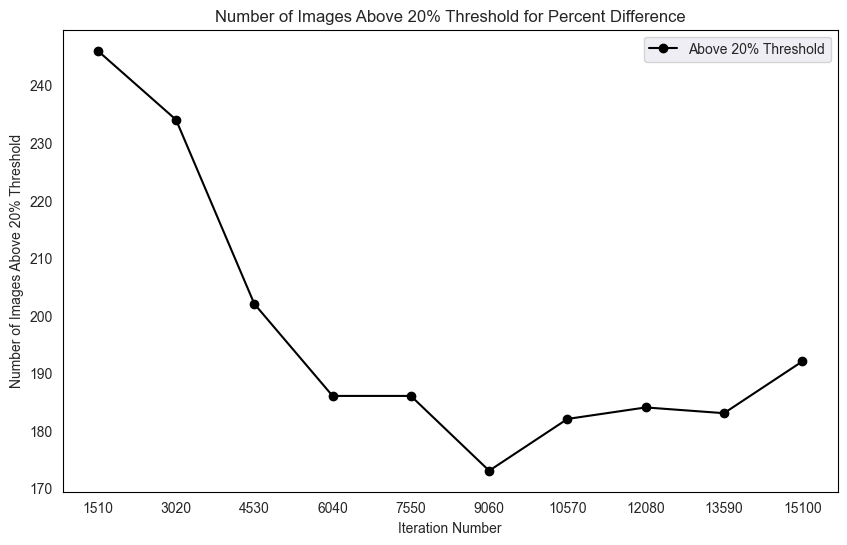

In [164]:
import matplotlib.pyplot as plt
import numpy as np
from os.path import join

# Define the threshold categories and their edges
threshold_labels = ["1% or less", "2%", "4%", "8%", "12%", "16%", "20%", "Over 20%"]
threshold_edges = [1.0, 2.0, 4.0, 8.0, 12.0, 16.0, 20.0, np.inf]

# Define the range of indices to consider and corresponding iteration numbers
indices_to_consider = range(10)  # Indices 0-9
iteration_numbers = [1510 * (i + 1) for i in indices_to_consider]

# Initialize a list to store the count of points above the 20% threshold for each iteration
above_20_counts = []

# Loop through each index in percent_diff_red to calculate the count of points above 20% threshold
for idx in indices_to_consider:
    # Count the number of images above the 20% threshold
    percent_diffs = percent_diff_red[idx]
    count_above_20 = sum(abs(diff) > 20 for diff in percent_diffs)
    above_20_counts.append(count_above_20)

# Plot the number of points above the 20% threshold as a line plot
plt.figure(figsize=(10, 6))
plt.plot(iteration_numbers, above_20_counts, marker='o', linestyle='-', color='black', label='Above 20% Threshold')

# Set the title and labels
plt.title("Number of Images Above 20% Threshold for Percent Difference")
plt.xlabel("Iteration Number")
plt.ylabel("Number of Images Above 20% Threshold")

# Set black axis lines
plt.gca().spines['top'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['right'].set_color('black')

# Set white background
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')

# Set x-axis ticks to be multiples of 1510
plt.xticks(iteration_numbers, [f'{x}' for x in iteration_numbers])

# Add a legend
plt.legend()

# Save the plot
outpath = r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\plots"
plt.savefig(join(outpath, "above_20_percent_threshold_plot.png"), dpi=300, bbox_inches='tight')
plt.show()


In [18]:
import numpy as np
import cv2
from PIL import Image
import os
from sklearn.metrics import jaccard_score

# Define paths
gt_path = r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\GT_HE\classification_07232024"
synthetic_paths = [
    r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_1510\classification_07302024",
    r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_3020\classification_07302024",
    r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_4530\classification_07302024",
    r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_6040\classification_07302024",
    r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_7550\classification_07302024",
    r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_9060\classification_07302024",
    r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_10570\classification_07302024",
    r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_12080\classification_07302024",
    r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_13590\classification_07302024",
    r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_15100\classification_07302024",
]

# List files in the ground truth path
only_files = [f for f in os.listdir(gt_path) if os.path.isfile(os.path.join(gt_path, f))]

# Loop through synthetic paths and calculate IoU
for index, syn_path in enumerate(synthetic_paths):
    for read_path in only_files:
        final_gt_path = os.path.join(gt_path, read_path)
        final_synthetic_path = os.path.join(syn_path, read_path.replace('.tif', '_inferred.tif'))
        final_gt_image_path = os.path.join(gt_path.replace(r'\classification_07232024', ''), read_path.replace('.tif', '.png'))
        # Ensure correct path handling and use of replace()
        final_synthetic_image_path = os.path.join(
            syn_path.replace(r'\classification_07302024', ''),  # Correct replacement syntax
            read_path.replace('.tif', '_inferred.png')  # Correct replacement for file extension
        )

        # Check if files exist
        if not os.path.exists(final_gt_path):
            print(f"Ground truth image file not found: {final_gt_path}")
            continue
        if not os.path.exists(final_synthetic_path):
            print(f"Synthetic image file not found: {final_synthetic_path}")
            continue
        if not os.path.exists(final_gt_image_path):
            print(f"Ground truth color image file not found: {final_gt_image_path}")
            continue
        if not os.path.exists(final_synthetic_image_path):
            print(f"Synthetic color image file not found: {final_synthetic_image_path}")
            continue

        # Read images in color
        gt_img = cv2.imread(final_gt_path, cv2.IMREAD_GRAYSCALE)
        syn_img = cv2.imread(final_synthetic_path, cv2.IMREAD_GRAYSCALE)
        gt_img_color = cv2.imread(final_gt_image_path, cv2.IMREAD_COLOR)
        syn_img_color = cv2.imread(final_synthetic_image_path, cv2.IMREAD_COLOR)

        # Check if images are read correctly
        if gt_img is None:
            print(f"Failed to read ground truth image: {final_gt_path}")
            continue
        if syn_img is None:
            print(f"Failed to read synthetic image: {final_synthetic_path}")
            continue
        if gt_img_color is None:
            print(f"Failed to read ground truth color image: {final_gt_image_path}")
            continue
        if syn_img_color is None:
            print(f"Failed to read synthetic color image: {final_synthetic_image_path}")
            continue

        # Flatten grayscale images to 1D for sklearn's jaccard_score function
        gt_flat = gt_img.flatten()
        syn_flat = syn_img.flatten()

        # Calculate IoU using jaccard_score
        iou_syn = jaccard_score(gt_flat, syn_flat, average='binary') * 100  # Convert to percentage

        # Create the IoU display image
        intersection = (gt_img == 1) & (syn_img == 1)
        union = (gt_img == 1) | (syn_img == 1)
        only_in_union = union & ~intersection

        display_array = np.zeros_like(gt_img, dtype=np.uint8)
        display_array[intersection] = 255
        display_array[only_in_union] = 128

        # Convert the IoU display array to RGB for concatenation
        display_image = Image.fromarray(display_array, mode='L').convert('RGB')

        # Convert OpenCV color images to PIL Images for concatenation
        gt_img_pil = Image.fromarray(cv2.cvtColor(gt_img_color, cv2.COLOR_BGR2RGB))
        syn_img_pil = Image.fromarray(cv2.cvtColor(syn_img_color, cv2.COLOR_BGR2RGB))

        # Concatenate images horizontally (left to right: GT, IoU image, Synthetic)
        combined_image = Image.new('RGB', (gt_img_pil.width + display_image.width + syn_img_pil.width, gt_img_pil.height))
        combined_image.paste(gt_img_pil, (0, 0))
        combined_image.paste(display_image, (gt_img_pil.width, 0))
        combined_image.paste(syn_img_pil, (gt_img_pil.width + display_image.width, 0))

        # Determine the IoU threshold bucket
        iou_bucket = int(iou_syn // 5) * 5
        if iou_syn == 100:
            iou_bucket = 100

        # Extract the parent directory for the current synthetic path
        output_dir_base = os.path.dirname(syn_path)
        # Create the output directory for the IoU buckets in the current synthetic path's parent directory
        output_dir = os.path.join(output_dir_base, f"iou_buckets/{iou_bucket}_percent")
        os.makedirs(output_dir, exist_ok=True)

        # Save the concatenated image in the appropriate IoU bucket folder as PNG
        output_image_path = os.path.join(output_dir, os.path.basename(final_synthetic_path).replace('.tif', '.png'))
        combined_image.save(output_image_path, format='PNG')

        print(f"Saved {output_image_path} to {iou_bucket}% bucket")


Saved \\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_1510\iou_buckets/30_percent\013_tile_00001_inferred.png to 30% bucket
Saved \\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_1510\iou_buckets/65_percent\013_tile_00002_inferred.png to 65% bucket
Saved \\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_1510\iou_buckets/55_percent\013_tile_00003_inferred.png to 55% bucket
Saved \\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_1510\iou_buckets/75_percent\013_tile_00004_inferred.png to 75% bucket
Saved \\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_1510\iou_buckets/50_percent\013_tile_00005_inferred.png to 50% bucket
Saved \\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_1510\iou_buckets/65_percent\013_tile_00006_inferred.png to 65% bucket
Saved \\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_1510\iou_buckets/75_percent

In [25]:
#counting files in the buckets
import os

# Define paths to the IoU bucket directories for each synthetic path
synthetic_paths = [
    r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_1510",
    r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_3020",
    r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_4530",
    r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_6040",
    r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_7550",
    r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_9060",
    r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_10570",
    r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_12080",
    r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_13590",
    r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_15100",
]

# Define IoU threshold to check
iou_threshold = 60
below_threshold_count = [];
# Loop through synthetic paths
for syn_path in synthetic_paths:
    iou_buckets_dir = os.path.join(syn_path, "iou_buckets")

    # Check if IoU buckets directory exists
    if not os.path.exists(iou_buckets_dir):
        print(f"IoU buckets directory does not exist for {syn_path}")
        continue

    # List directories for IoU buckets
    bucket_dirs = [d for d in os.listdir(iou_buckets_dir) if os.path.isdir(os.path.join(iou_buckets_dir, d))]

    count_below_threshold = 0

    # Count the number of images in each bucket below the threshold
    for bucket in bucket_dirs:
        try:
            bucket_value = int(bucket.split('_')[0])
            if bucket_value < iou_threshold:
                bucket_path = os.path.join(iou_buckets_dir, bucket)
                num_files = len([f for f in os.listdir(bucket_path) if os.path.isfile(os.path.join(bucket_path, f))])
                count_below_threshold += num_files
                print(f"{syn_path} - {bucket}: {num_files} files")
        except ValueError:
            print(f"Skipping non-numeric bucket: {bucket}")

    print(f"Total files in {syn_path} below {iou_threshold}% IoU: {count_below_threshold}")
    below_threshold_count.append(count_below_threshold)


\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_1510 - 0_percent: 20 files
\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_1510 - 10_percent: 4 files
\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_1510 - 15_percent: 10 files
\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_1510 - 20_percent: 10 files
\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_1510 - 25_percent: 10 files
\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_1510 - 30_percent: 21 files
\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_1510 - 35_percent: 34 files
\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_1510 - 40_percent: 36 files
\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_1510 - 45_percent: 45 files
\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\iter_1510 - 50_percent: 5

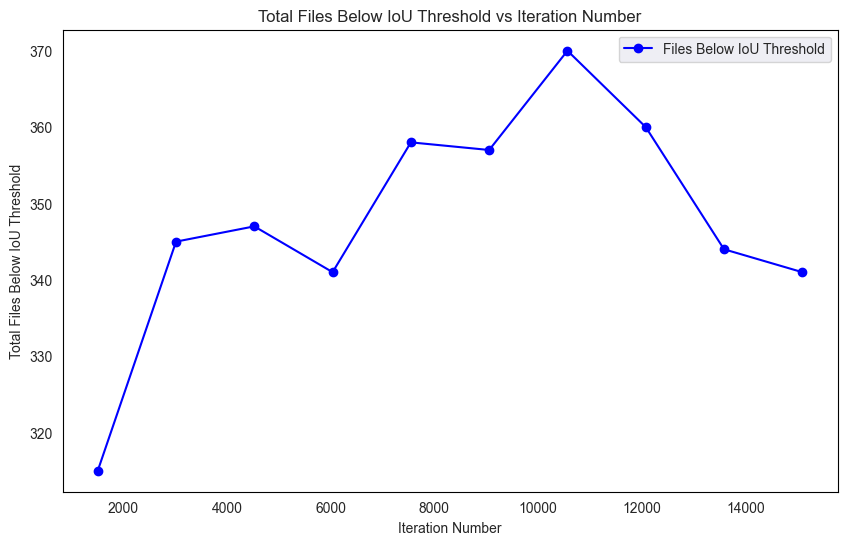

In [27]:
import matplotlib.pyplot as plt
import os

# X-axis values (multiples of 1510 from 1510 to 15100)
iteration_numbers = list(range(1510, 15110, 1510))

# Y-axis values (the count of files below the IoU threshold for each iteration)
# Replace with your actual `below_threshold_count` values
  # Example data

# Plotting the data
plt.figure(figsize=(10, 6))

# Set figure and axes background color to white
plt.gca().set_facecolor('white')  # Plot background
plt.gcf().set_facecolor('white')  # Figure background

plt.plot(iteration_numbers, below_threshold_count, marker='o', linestyle='-', color='b', label='Files Below IoU Threshold')

# Customize the plot
plt.xlabel('Iteration Number')
plt.ylabel('Total Files Below IoU Threshold')
plt.title('Total Files Below IoU Threshold vs Iteration Number')
plt.legend()

# Remove gridlines
plt.grid(False)

# Set axis line colors to black
plt.gca().spines['top'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['bottom'].set_color('black')

# Save the plot to the specified path
save_path = r"\\10.99.68.178\ashleyex\Type_1_diabetes\HE2IHC\results\inferred_IHC\plots"
os.makedirs(save_path, exist_ok=True)  # Ensure the directory exists
plot_file = os.path.join(save_path, 'below_iou_threshold_vs_iteration.png')
plt.savefig(plot_file, bbox_inches='tight')

# Show the plot
plt.show()
